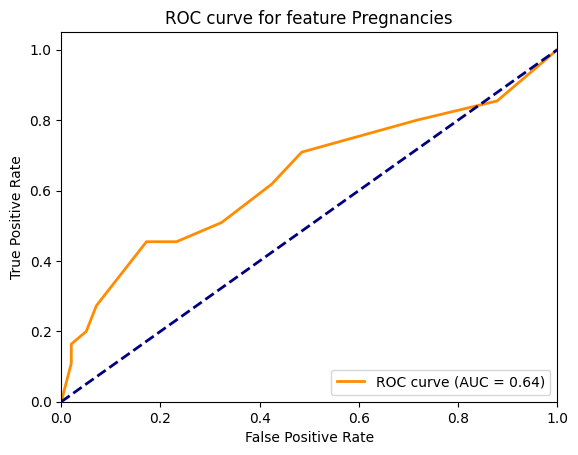

Optimal threshold for feature Pregnancies: 7.00


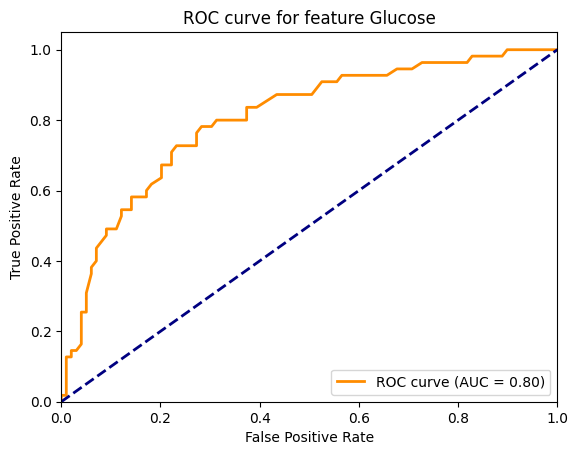

Optimal threshold for feature Glucose: 119.00


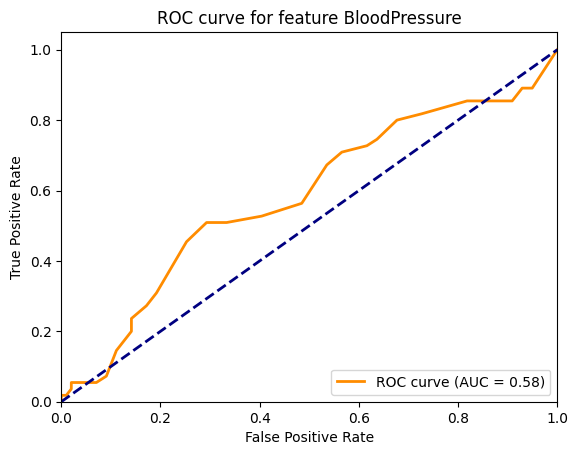

Optimal threshold for feature BloodPressure: 76.00


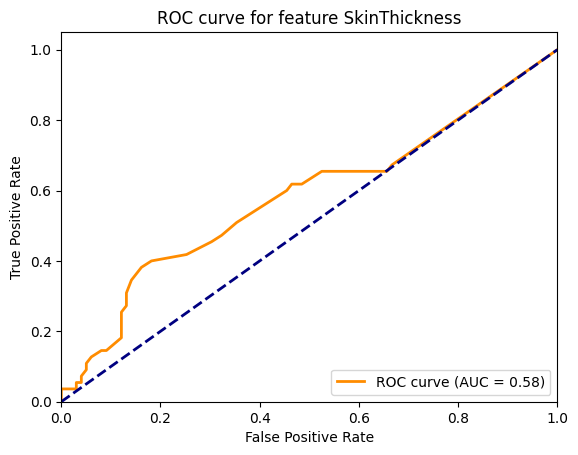

Optimal threshold for feature SkinThickness: 34.00


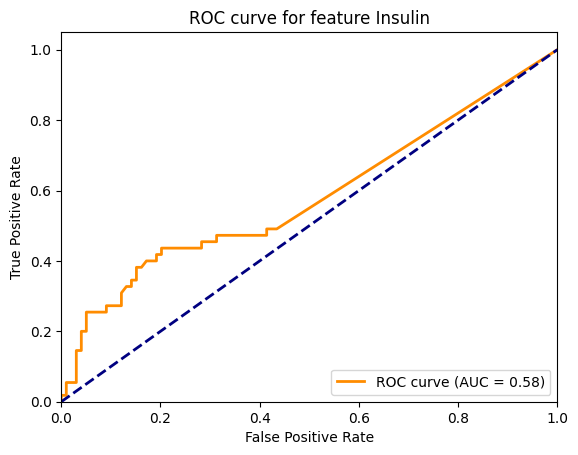

Optimal threshold for feature Insulin: 100.00


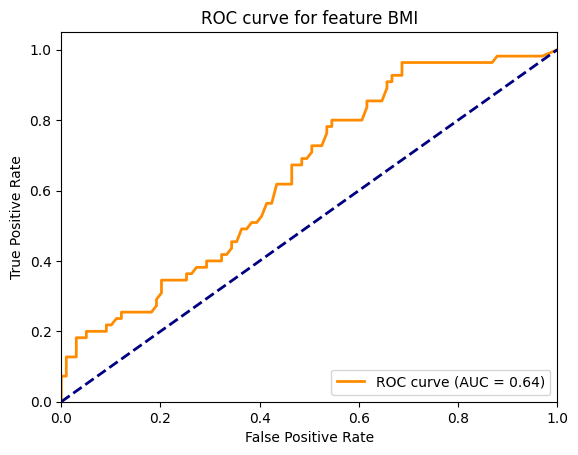

Optimal threshold for feature BMI: 27.50


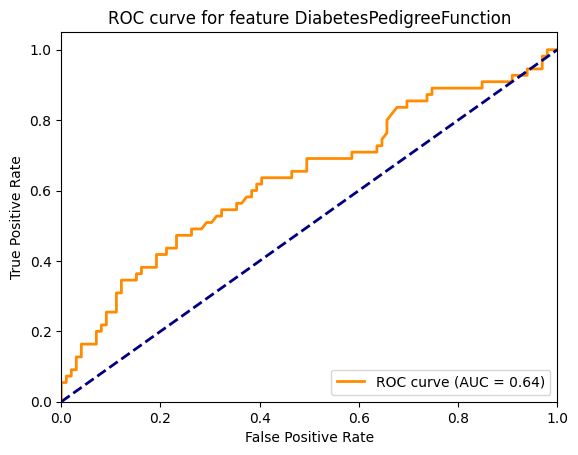

Optimal threshold for feature DiabetesPedigreeFunction: 0.57


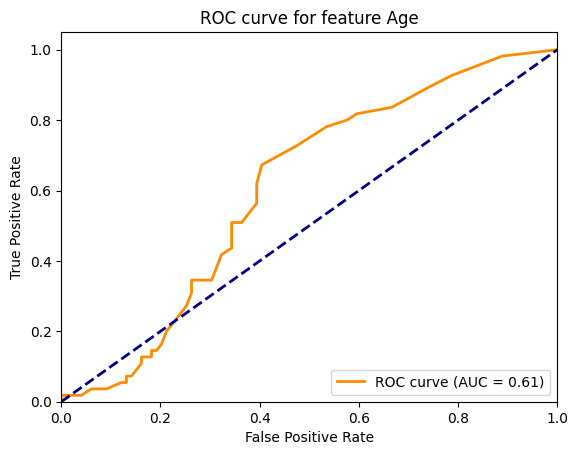

Optimal threshold for feature Age: 30.00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

# Load PIMA diabetes dataset
data = pd.read_csv("/content/diabetes.csv")

# Separate features and target variable
X = data.drop(columns=["Outcome"])
y = data["Outcome"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM classifier
clf = SVC(kernel="linear", probability=True)
clf.fit(X_train, y_train)

# Get predicted probabilities for test set
probs = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for each feature
features = X.columns
for feature in features:
    fpr, tpr, thresholds = roc_curve(y_test, X_test[feature])
    roc_auc = auc(fpr, tpr)
    
    # Find optimal threshold that maximizes Youden's index
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for feature %s' % feature)
    plt.legend(loc="lower right")
    plt.show()
    
    # Print optimal threshold
    print("Optimal threshold for feature %s: %0.2f" % (feature, optimal_threshold))
